In [1]:
# import library yang digunakan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # atau MinMaxScaler untuk normalisasi
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Ganti 'nama_file.csv' dengan nama file dataset yang Anda miliki
data = pd.read_csv('diabetes.csv')

# Periksa lima baris pertama dataset untuk memahami strukturnya
print(data.head())

# Periksa informasi dataset untuk melihat tipe data dan nilai-nilai non-null
print(data.info())

# Periksa statistik deskriptif untuk setiap fitur
print(data.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

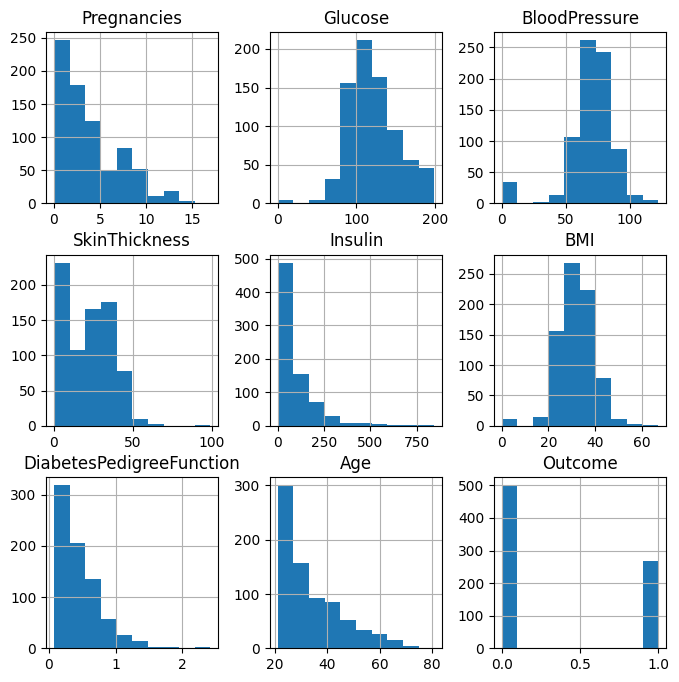

In [3]:
# Misalnya, Anda dapat menggunakan histogram untuk melihat distribusi dari fitur-fitur numerik
data.hist(figsize=(8, 8))
plt.show()


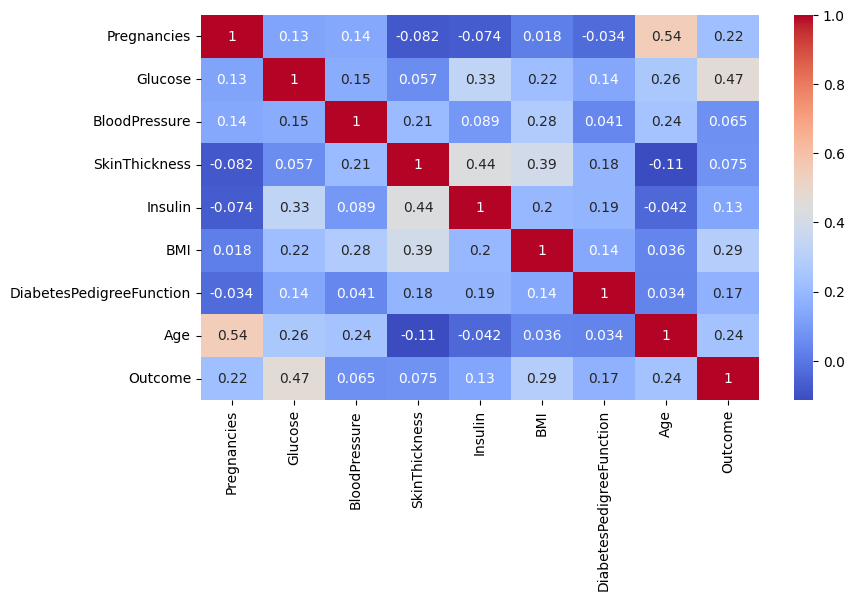

In [4]:
# Anda juga dapat menggunakan heatmap untuk melihat korelasi antar fitur
plt.figure(figsize=(9, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [5]:
# Periksa jumlah missing values untuk setiap fitur
missing_values = data.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)


Jumlah Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
# Jika ada nilai yang hilang, tentukan strategi untuk menangani nilai-nilai yang hilang tersebut.
# Misalnya, isi nilai yang hilang dengan nilai rata-rata atau median dari setiap fitur.
data.fillna(data.mean(), inplace=True)

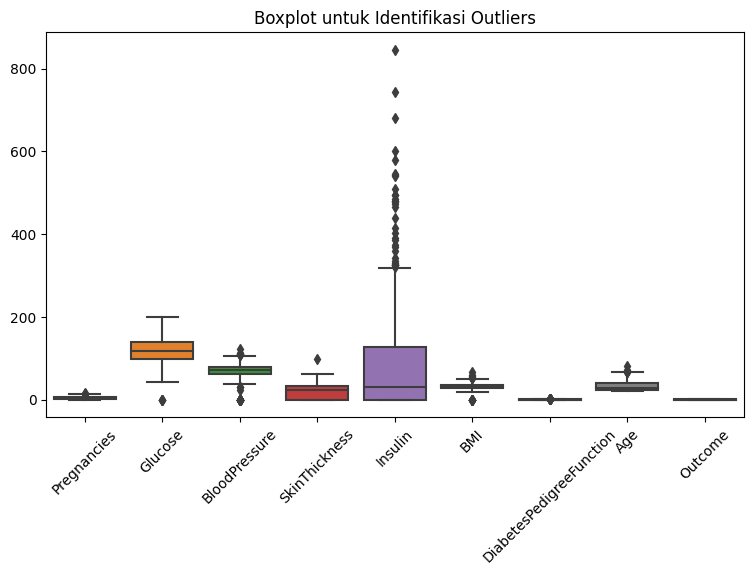

Jumlah Outliers: 129


In [7]:
# Gunakan boxplot untuk mengidentifikasi outlier dalam fitur-fitur numerik
plt.figure(figsize=(9, 5))
sns.boxplot(data=data)
plt.title("Boxplot untuk Identifikasi Outliers")
plt.xticks(rotation=45)
plt.show()

# Atau gunakan metode lain seperti IQR (Interquartile Range) untuk mendeteksi outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
print("Jumlah Outliers:", outliers.sum())

# Anda dapat memutuskan apakah ingin menghapus outlier atau menangani mereka dengan metode lain.
# Misalnya, Anda bisa menghapus baris yang mengandung outlier:
data_cleaned = data[~outliers]


In [8]:
# Hitung IQR (Interquartile Range) untuk setiap fitur
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan batas bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi baris yang mengandung outlier
outliers_index = ((data < lower_bound) | (data > upper_bound)).any(axis=1)

# Hapus baris yang mengandung outlier
data_cleaned = data[~outliers_index]

# Periksa jumlah outlier yang berhasil dihapus
print("Jumlah Outliers yang Dihapus:", outliers_index.sum())

# Periksa dimensi dataset setelah penghapusan outlier
print("Dimensi Dataset Setelah Penghapusan Outliers:", data_cleaned.shape)


Jumlah Outliers yang Dihapus: 129
Dimensi Dataset Setelah Penghapusan Outliers: (639, 9)


In [9]:
# Periksa dimensi dataset setelah penghapusan outlier
print("Dimensi Dataset Setelah Penghapusan Outliers:", data_cleaned.shape)

# Tampilkan lima baris pertama dari dataset yang sudah dibersihkan
print("Dataset Setelah Penghapusan Outliers:")
print(data_cleaned.head())

# Jika Anda memerlukan informasi lebih lanjut, Anda dapat menggunakan info() dan describe() untuk memeriksa tipe data dan statistik deskriptif dari dataset yang sudah dibersihkan
print("\nInformasi Dataset Setelah Penghapusan Outliers:")
print(data_cleaned.info())

print("\nStatistik Deskriptif Dataset Setelah Penghapusan Outliers:")
print(data_cleaned.describe())


Dimensi Dataset Setelah Penghapusan Outliers: (639, 9)
Dataset Setelah Penghapusan Outliers:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0  

Informasi Dataset Setelah Penghapusan Outliers:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
--

In [11]:
# Function
# Definisikan fungsi trainSemua
def trainSemua(x_train, y_train):
    nb = GaussianNB()
    nb.fit(x_train, y_train)
    return nb

# Definisikan fungsi predikSemua
def predikSemua(nb, x_test, y_test):
    nbPred = nb.predict(x_test)
    nbAcc = accuracy_score(y_test, nbPred)
    return nbAcc

In [12]:
# Misalnya, isi nilai yang hilang dengan nilai rata-rata atau median dari setiap fitur
data.fillna(data.mean(), inplace=True)

# Pisahkan fitur dan label kelas
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [13]:
# Bagi dataset menjadi data pelatihan dan pengujian
# Bagi dataset menjadi data pelatihan dan data pengujian dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data menggunakan StandardScaler
#scaler = StandardScaler()
#X_train_normalized = scaler.fit_transform(X_train)
#X_test_normalized = scaler.transform(X_test)

In [ ]:
# Cell berikut untuk data yang belum diNormalisasi

In [14]:
nb = trainSemua(X_train, y_train)

In [15]:
nbAcc = predikSemua(nb, X_test, y_test)

In [16]:
# Deklarasi Scaler dan scale fitur
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [17]:
# Split ulang menjadi train dan test sesuai rasio yang disebutkan.
# Menggunakan fitur X yang sudah dinormalisasi
x_trainN, x_testN, y_trainN, y_testN = train_test_split(X_norm, y, test_size = 0.2, random_state=42)

In [ ]:
# Cell berikut untuk data yang sudah diNormalisasi

In [18]:
nbN = trainSemua(x_trainN, y_trainN)

In [19]:
nbAccN = predikSemua(nbN, x_testN, y_testN)

In [20]:
print("Naive Bayes (Belum Dinormalisasi):", nbAcc)
print("Naive Bayes (Dinormalisasi):", nbAccN)

Naive Bayes (Belum Dinormalisasi): 0.7662337662337663
Naive Bayes (Dinormalisasi): 0.7662337662337663


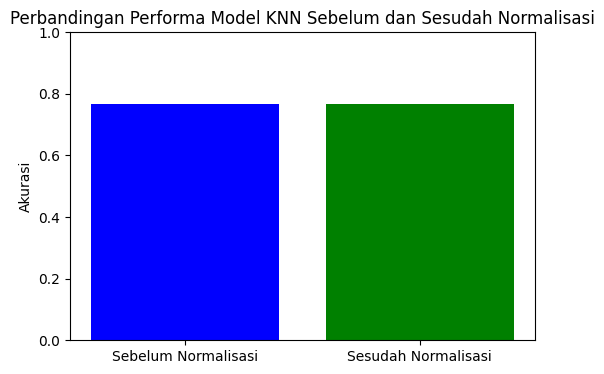

In [21]:
import matplotlib.pyplot as plt

# Daftar akurasi sebelum dan setelah normalisasi
accuracies = [nbAcc, nbAccN]
labels = ['Sebelum Normalisasi', 'Sesudah Normalisasi']

# Plot bar
plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('Perbandingan Performa Model KNN Sebelum dan Sesudah Normalisasi')
plt.ylabel('Akurasi')
plt.ylim(0, 1)  # Rentang sumbu y dari 0 hingga 1 untuk akurasi
plt.show()
